In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load and Read the City and Ride Data
city_data =pd.read_csv("data/city_data.csv")
ride_data =pd.read_csv("data/ride_data.csv")

# Combine the data into a single dataset
combined_city_ride_data=pd.merge(ride_data, city_data, how="left", on="city")
# Display the data table for preview
combined_city_ride_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [3]:
# create a dataset for unique city entries
summary_city_ride_data=combined_city_ride_data.drop_duplicates(["city"])
summary_city_ride_data.reset_index().head()

,index,city,date,fare,ride_id,driver_count,type
0,0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [4]:
# Obtain the x and y coordinates for each of the three city types:

#Urban
#to create a database for urban rides only
urban_cities_data=combined_city_ride_data[combined_city_ride_data["type"]=="Urban"]
#urban_cities_data.head() # verified
#to calculate urban number of rides
urban_ride_list=urban_cities_data.groupby(['type','city'])["ride_id"].count()['Urban']
#urban_ride_list.head() # verified
#to calculate average fares for urban rides
urban_aver_fare=urban_cities_data.groupby(['city'])["fare"].mean()
#urban_aver_fare.head() # verified
#to calculate number of drivers per city
urban_drivers=urban_cities_data.groupby(["city"]).mean()["driver_count"]
#urban_drivers.head() #verified

In [5]:
#Suburban
#to create a database for suburban rides only
suburban_cities_data=combined_city_ride_data[combined_city_ride_data["type"]=="Suburban"]
#suburban_cities_data.head() # verified
#to calculate suburban number of rides
suburban_ride_list=suburban_cities_data.groupby(['type','city'])["ride_id"].count()['Suburban']
#suburban_ride_list.head() # verified
#to calculate average fares for suburban rides
suburban_aver_fare=suburban_cities_data.groupby(['city'])["fare"].mean()
#urban_aver_fare.head() # verified
#to calculate number of drivers per suburban city
suburban_drivers=suburban_cities_data.groupby(["city"]).mean()["driver_count"]
#suburban_drivers.head() #verified

In [6]:
#Rural
#to create a database for rural rides only
rural_cities_data=combined_city_ride_data[combined_city_ride_data["type"]=="Rural"]
#rural_cities_data.head() # verified
#to calculate rural number of rides
rural_ride_list=rural_cities_data.groupby(['type','city'])["ride_id"].count()['Rural']
#rural_ride_list.head() # verified
#to calculate average fares for rural rides
rural_aver_fare=rural_cities_data.groupby(['city'])["fare"].mean()
#rural_aver_fare.head() # verified
#to calculate number of drivers per rural city
rural_drivers=rural_cities_data.groupby(["city"]).mean()["driver_count"]
#rural_drivers.head() #verified

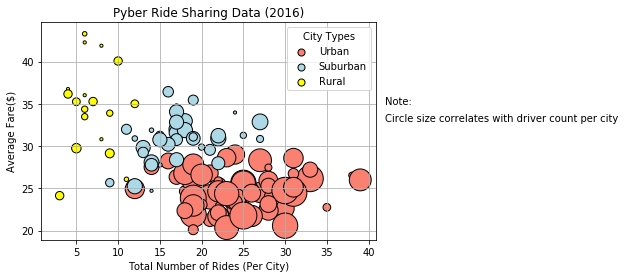

In [25]:
#Build the scatter plots for each city types
plt.scatter(urban_ride_list, urban_aver_fare, s=10*urban_drivers, marker="o", facecolor="salmon", 
            edgecolor="black", label="Urban")
plt.scatter(suburban_ride_list, suburban_aver_fare, s=10*suburban_drivers, marker="o", facecolor="lightblue", 
            edgecolor="black", label="Suburban")
plt.scatter(rural_ride_list, rural_aver_fare, s=10*rural_drivers, marker="o", facecolor="yellow", 
            edgecolor="black", label="Rural")

# Incorporate the other graph properties
plt.grid(True)
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")

# Create a legend
legend=plt.legend(loc="best", title="City Types")
legend.legendHandles[0]._sizes = [50]
legend.legendHandles[1]._sizes = [50]
legend.legendHandles[2]._sizes = [50]

# Incorporate a text label regarding circle size
plt.text(42,35, "Note:")
plt.text(42,33, "Circle size correlates with driver count per city")

# Save Figure
plt.savefig("Images/Pyber_ANZ_scatter.png")
plt.show()

## Total Fares by City Type

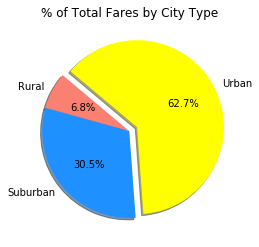

In [10]:
from matplotlib.patches import Ellipse
# Calculate Type Percents
total_fare=combined_city_ride_data.groupby('type')["fare"].sum() 
#total_fare
labels=["Rural", "Suburban", "Urban"]
sizes=total_fare
colors=["salmon", "dodgerblue", "yellow"]
explode=(0, 0, 0.1)

# Build Pie Chart
plt.title("% of Total Fares by City Type")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=140)

# Extra formatting
#fig=plt.figure()
#fig.set_size_inches(7, 4)
#ax1.add_artist(Ellipse((.75, .75), .5, 1)

# Save Figure # will add once chart is fixed
plt.savefig("Images/Pyber_ANZ_pie_fares.png")
plt.show()

## Total Rides by City Type

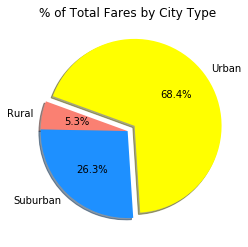

In [12]:
# Calculate Ride Percents
total_rides=combined_city_ride_data.groupby('type')["city"].count() 
#total_rides
# Build Pie Chart
labels=["Rural", "Suburban", "Urban"]
sizes=total_rides
colors=["salmon", "dodgerblue", "yellow"]
explode=(0, 0, 0.1)

plt.title("% of Total Fares by City Type")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=160)
# Save Figure
plt.savefig("Images/Pyber_ANZ_pie_rides.png")
plt.show()

## Total Drivers by City Type

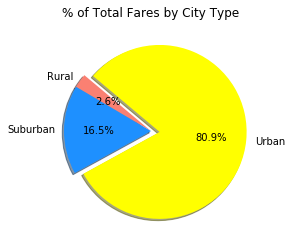

In [14]:
# Calculate Driver Percents 
#using stripped of doubles on a "city" dataset
total_drivers=summary_city_ride_data.groupby('type')["driver_count"].sum() 
#total_drivers

# Build Pie Charts
labels=["Rural", "Suburban", "Urban"]
sizes=total_drivers
colors=["salmon", "dodgerblue", "yellow"]
explode=(0, 0, 0.1)

plt.title("% of Total Fares by City Type")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=140)

# Save Figure
plt.savefig("Images/Pyber_ANZ_pie_drivers.png")
plt.show()